In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import sources.raw as sources_raw

## Товары

In [30]:
items_df = sources_raw.load_raw_items()

In [31]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [32]:
print('Записей', items_df.shape)
print('Товаров', items_df['item_id'].unique().shape)
print('Категорий', items_df['item_category_id'].unique().shape)

Записей (22170, 3)
Товаров (22170,)
Категорий (84,)


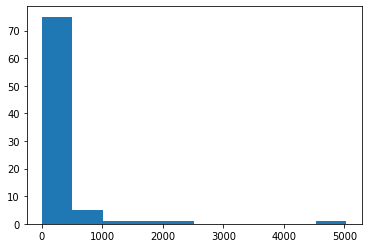

In [33]:
categories_grp = items_df.groupby('item_category_id')
count_per_group = categories_grp['item_id'].count()
plt.hist(count_per_group)
plt.show()

## Категории

In [12]:
categories_df = pd.read_csv('data/item_categories.csv')

In [13]:
categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [15]:
print('Записей', categories_df.shape)
print('Категорий', categories_df['item_category_id'].unique().shape)

Записей (84, 2)
Категорий (84,)


## Продажи. Данные для обучения

In [5]:
sales_train_df = sources_raw.load_raw_sales_train()

In [6]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.000000,1.0
1,2013-01-03,0,25,2552,899.000000,1.0
2,2013-01-05,0,25,2552,899.000000,-1.0
3,2013-01-06,0,25,2554,1709.050049,1.0
4,2013-01-15,0,25,2555,1099.000000,1.0


In [10]:
for column in sales_train_df.columns:
    print(column, 'min =', sales_train_df[column].min(), 'max =', sales_train_df[column].max())

date min = 2013-01-01 00:00:00 max = 2015-10-31 00:00:00
date_block_num min = 0 max = 33
shop_id min = 0 max = 59
item_id min = 0 max = 22169
item_price min = -1.0 max = 307980.0
item_cnt_day min = -22.0 max = 2169.0


In [11]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    uint16
shop_id           uint8
item_id           uint16
item_price        float32
item_cnt_day      float32
dtypes: datetime64[ns](1), float32(2), uint16(2), uint8(1)
memory usage: 58.8 MB


In [12]:
sales_train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [13]:
date_min = sales_train_df['date'].min()
date_max = sales_train_df['date'].max()
print('Date from {} to {}. Len {}'.format(date_min, date_max, date_max-date_min))

Date from 2013-01-01 00:00:00 to 2015-10-31 00:00:00. Len 1033 days 00:00:00


In [14]:
print('Dates', sales_train_df['date'].unique().shape)
print('Shops', sales_train_df['shop_id'].unique().shape)
print('Items', sales_train_df['item_id'].unique().shape)

Dates (1034,)
Shops (60,)
Items (21807,)


In [15]:
sales_train_df[sales_train_df['item_price'] == sales_train_df['item_price'].max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


In [16]:
items_df[items_df['item_id'] == 6066]

NameError: name 'items_df' is not defined

/home/disokolov/PythonProjects/competitive-data-science-predict-future-sales/venv/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


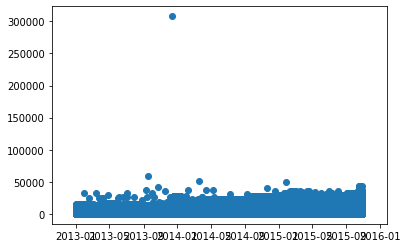

In [76]:
plt.scatter(sales_train_df.date, sales_train_df.item_price)
plt.show()

In [107]:
df = sales_train_df.groupby('item_id')['date'].count().reset_index(name='count')
df = df.sort_values(['count'], ascending=False)
df.head()

,item_id,count
20602,20949,31340
5717,5822,9408
17418,17717,9067
2749,2808,7479
4097,4181,6853


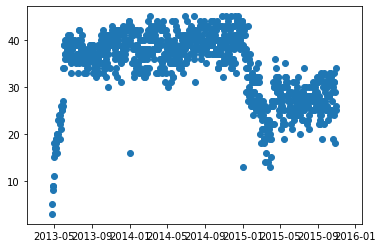

In [108]:
df = sales_train_df[sales_train_df['item_id'] == 20949]
df = df.groupby('date')['item_id'].count().reset_index(name='count')
df.head()
plt.scatter(df.date, df['count'])
plt.show()

## Продажи. Тестовые данные

In [2]:
sales_test_df = sources_raw.load_raw_test()

In [3]:
sales_test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [28]:
train_shop_ids = sales_train_df.shop_id.unique()
test_shop_ids = sales_test_df.shop_id.unique()
for test_shop_id in test_shop_ids:
    if test_shop_id not in train_shop_ids:
        print(test_shop_id)

In [39]:
train_item_ids = sales_train_df.item_id.unique()
test_item_ids = sales_test_df.item_id.unique()
not_in_train_item_ids = []
in_train_item_ids = []
for test_item_id in test_item_ids:
    if test_item_id not in train_item_ids:
        not_in_train_item_ids.append(test_item_id)
    else:
        in_train_item_ids.append(test_item_id)
print('В тестовой выборке {} товаров из обучающей'.format(len(in_train_item_ids)))
print('В тестовой выборке {} товаров НЕ из обучающей'.format(len(not_in_train_item_ids)))

В тестовой выборке 4737 товаров из обучающей
В тестовой выборке 363 товаров НЕ из обучающей


In [42]:
items_df[items_df['item_id']==5320].shape

(1, 3)

In [41]:
sales_train_df[sales_train_df['item_id']==5320].shape

(0, 6)

In [40]:
sales_test_df[sales_test_df['item_id']==5320].shape

(42, 3)

In [44]:
sales_df = sources_raw.load_raw_sales_train()
shops_df = sources_raw.load_raw_shops()
categories_df = sources_raw.load_raw_categories()
items_df = sources_raw.load_raw_items()

In [45]:
result = sales_df.merge(shops_df, how='left', on='shop_id')

In [47]:
result = result.merge(items_df, how='left', on='item_id')

In [49]:
result = result.merge(categories_df, how='left', on='item_category_id')

In [50]:
result.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.000000,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.000000,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,2013-01-05,0,25,2552,899.000000,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,2013-01-06,0,25,2554,1709.050049,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,2013-01-15,0,25,2555,1099.000000,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [54]:
result['shop_name'] = result['shop_name'].astype('category')
result['item_name'] = result['item_name'].astype('category')
result['item_category_name'] = result['item_category_name'].astype('category')

In [55]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  datetime64[ns]
date_block_num        uint16
shop_id               uint8
item_id               uint16
item_price            float32
item_cnt_day          float32
shop_name             category
item_name             category
item_category_id      uint16
item_category_name    category
dtypes: category(3), datetime64[ns](1), float32(2), uint16(3), uint8(1)
memory usage: 98.8 MB
